In [31]:
#this code introduces you to machine learning training and inference (predictions) in Python on AWS

#start a line with '!' to write to the command line instead. 
#This allows you to install packages to the EC2 instance from within jupyter
'''!pip install pandas
!pip install seaborn
!pip install sklearn
!pip install numpy'''

#import the packages that you installed
import pandas as pd
import seaborn.apionly as sns
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
from scipy.stats import randint as sp_randint
import time
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing, cross_validation
import pandas as pd



In [32]:
import pandas
df=pandas.read_csv('mfc.csv', error_bad_lines=False, index_col=0)
df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
df.dtypes

NPI                             int64
Gender                         object
State                          object
OpioidPrescriberRate          float64
Specialty                      object
BrandClaimsPct                float64
TotalOpioidCompanyPayments    float64
Zip                             int64
ru2003                        float64
Urban                          object
HighPrescriber                 object
dtype: object

In [34]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Gender,State,Specialty,Urban,HighPrescriber
1,M,MA,Internal Medicine,Urban,NotHigh
2,M,IN,General Surgery,Urban,High
3,M,IN,Family Practice,Urban,High
4,M,IN,Otolaryngology,Urban,NotHigh
5,M,IN,Nurse Practitioner,Urban,High


In [35]:
scrubber = {"Urban": {"Non Urban": 0, "Urban": 1, "0": 3} }

In [36]:
df.replace(scrubber, inplace=True)
df.head()

,NPI,Gender,State,OpioidPrescriberRate,Specialty,BrandClaimsPct,TotalOpioidCompanyPayments,Zip,ru2003,Urban,HighPrescriber
1,1518042571,M,MA,2.34,Internal Medicine,0.108623,16.49,1001,2.0,1,NotHigh
2,1295852101,M,IN,44.00,General Surgery,0.146667,0.00,47710,2.0,1,High
3,1376982371,M,IN,9.32,Family Practice,0.000000,12.86,47710,2.0,1,High
4,1679731665,M,IN,2.66,Otolaryngology,0.140436,0.00,47710,2.0,1,NotHigh
5,1568630127,M,IN,9.28,Nurse Practitioner,0.086446,0.00,47710,2.0,1,High


In [37]:
df["State"] = df["State"].astype('category')
df["Specialty"] = df["Specialty"].astype('category')
df["Gender"] = df["Gender"].astype('category')
df["state_cat"] = df["State"].cat.codes
df["speciality_cat"] = df["Specialty"].cat.codes
df["Gender"] = df["Gender"].cat.codes
df.head()

,NPI,Gender,State,OpioidPrescriberRate,Specialty,BrandClaimsPct,TotalOpioidCompanyPayments,Zip,ru2003,Urban,HighPrescriber,state_cat,speciality_cat
1,1518042571,1,MA,2.34,Internal Medicine,0.108623,16.49,1001,2.0,1,NotHigh,21,41
2,1295852101,1,IN,44.00,General Surgery,0.146667,0.00,47710,2.0,1,High,17,28
3,1376982371,1,IN,9.32,Family Practice,0.000000,12.86,47710,2.0,1,High,17,24
4,1679731665,1,IN,2.66,Otolaryngology,0.140436,0.00,47710,2.0,1,NotHigh,17,71
5,1568630127,1,IN,9.28,Nurse Practitioner,0.086446,0.00,47710,2.0,1,High,17,62


In [38]:
df.dtypes

NPI                              int64
Gender                            int8
State                         category
OpioidPrescriberRate           float64
Specialty                     category
BrandClaimsPct                 float64
TotalOpioidCompanyPayments     float64
Zip                              int64
ru2003                         float64
Urban                            int64
HighPrescriber                  object
state_cat                         int8
speciality_cat                    int8
dtype: object

In [39]:
df.columns

Index([u'NPI', u'Gender', u'State', u'OpioidPrescriberRate', u'Specialty',
       u'BrandClaimsPct', u'TotalOpioidCompanyPayments', u'Zip', u'ru2003',
       u'Urban', u'HighPrescriber', u'state_cat', u'speciality_cat'],
      dtype='object')

In [40]:
df.drop(['Specialty','State','NPI'], 1, inplace=True)

In [41]:
df.drop(['OpioidPrescriberRate'], 1, inplace=True)

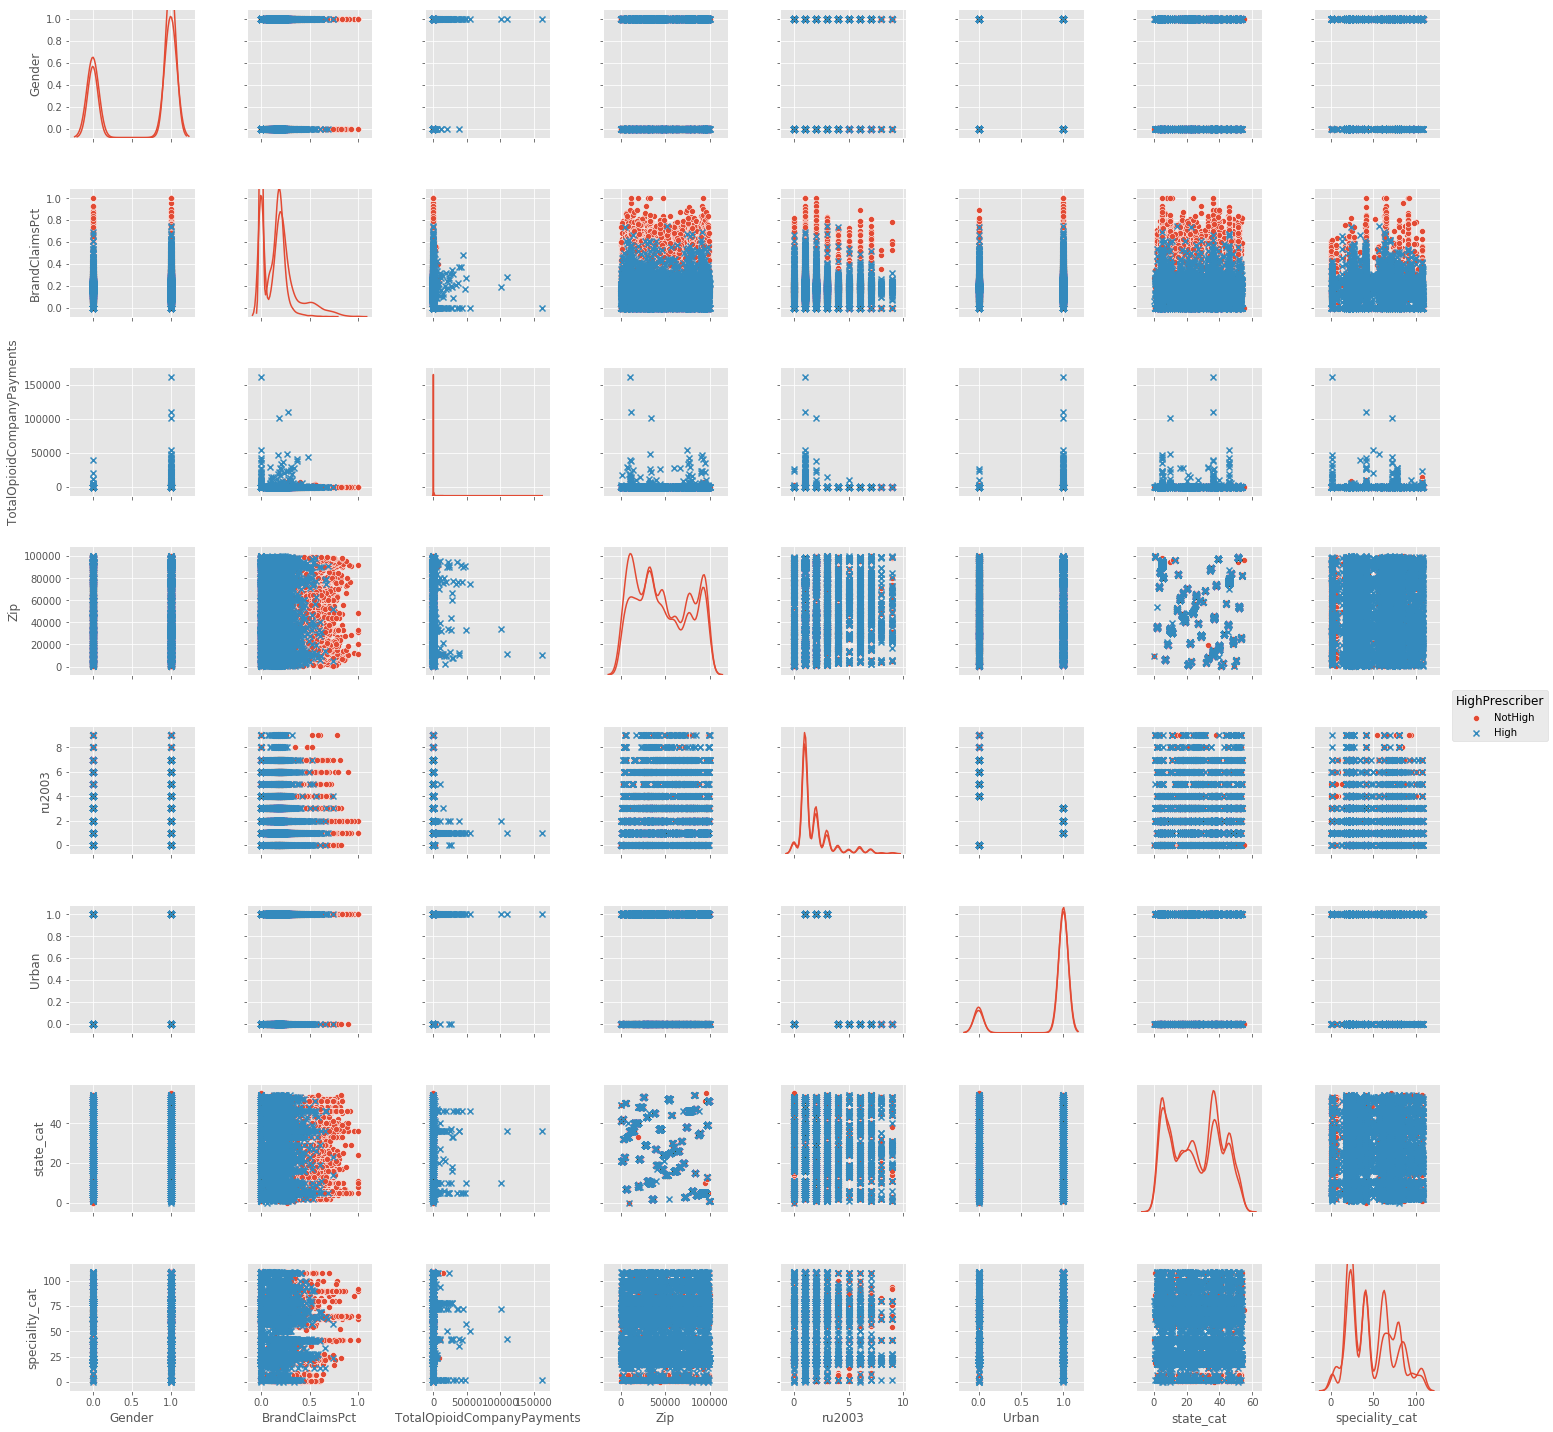

In [42]:
sns.pairplot(df, hue="HighPrescriber", diag_kind="kde",markers=['o','x'])

In [29]:
df.dtypes

Gender                           int8
BrandClaimsPct                float64
TotalOpioidCompanyPayments    float64
ru2003                        float64
Urban                           int64
HighPrescriber                 object
y                               int64
dtype: object

In [14]:
#load a default seaborn dataset, display simple stats about data size, and then print the data's head
print 'shape of the data frame'+str(df.shape)
print df.groupby(['HighPrescriber']).size()


shape of the data frame(25264, 9)
HighPrescriber
High       15266
NotHigh     9998
dtype: int64


In [15]:
df.head(10)

,Gender,BrandClaimsPct,TotalOpioidCompanyPayments,Zip,ru2003,Urban,HighPrescriber,state_cat,speciality_cat
1,1,0.108623,16.49,1001,2.0,1,NotHigh,21,41
2,1,0.146667,0.00,47710,2.0,1,High,17,28
3,1,0.000000,12.86,47710,2.0,1,High,17,24
4,1,0.140436,0.00,47710,2.0,1,NotHigh,17,71
5,1,0.086446,0.00,47710,2.0,1,High,17,62
6,1,0.125402,0.00,47710,2.0,1,High,17,24
7,1,0.248039,12.86,47710,2.0,1,High,17,24
8,1,0.113712,12.86,47710,2.0,1,High,17,24
9,1,0.000000,12.86,47710,2.0,1,High,17,24
10,1,0.000000,0.00,47710,2.0,1,High,17,21


In [43]:

df['y']= np.where(df['HighPrescriber']=='High', 1,0)
print df.groupby(['y']).size()

y
0     9998
1    15266
dtype: int64


In [44]:
#split into train and test
X=df.drop('HighPrescriber',1).drop('y',1)
y=df['y']
RANDOM_STATE=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)
print ('the number in training set: '+str(len(X_train)))
print ('the number in test set: '+str(len(X_test)))


the number in training set: 18948
the number in test set: 6316


In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123)
rf.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=123,
            verbose=0, warm_start=False)

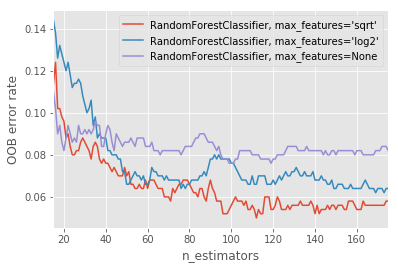

In [46]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier



RANDOM_STATE = 123

# Generate a binary classification dataset.
X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [49]:
#Randomized search for model selection
clf = DecisionTreeClassifier()
# Utility function to report best scores
def report(results, n_top=10):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean OOB score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"min_samples_split": sp_randint(1,20),
              "max_depth": [4, None],
              "min_samples_leaf": sp_randint(1,20),
                "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

random_search.fit(X_train, y_train)
#this might take a minute to run
print("RandomizedSearchCV examined %d candidate parameter settings." % (n_iter_search))
report(random_search.cv_results_)


RandomizedSearchCV examined 10 candidate parameter settings.
Model with rank: 1
Mean OOB score: 0.724 (std: 0.003)
Parameters: {'min_samples_split': 2, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 17}

Model with rank: 2
Mean OOB score: 0.718 (std: 0.005)
Parameters: {'min_samples_split': 5, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 15}

Model with rank: 3
Mean OOB score: 0.716 (std: 0.000)
Parameters: {'min_samples_split': 4, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 11}

Model with rank: 4
Mean OOB score: 0.713 (std: 0.002)
Parameters: {'min_samples_split': 10, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 10}

Model with rank: 5
Mean OOB score: 0.706 (std: 0.003)
Parameters: {'min_samples_split': 5, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 7}

Model with rank: 6
Mean OOB score: 0.699 (std: 0.008)
Parameters: {'min_samples_split': 17, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_le

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


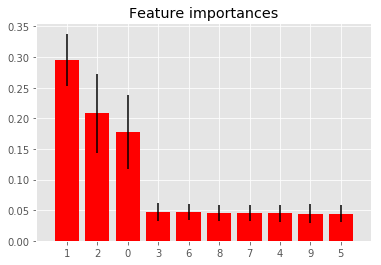

In [55]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [56]:
df.columns

Index([u'Gender', u'BrandClaimsPct', u'TotalOpioidCompanyPayments', u'Zip',
       u'ru2003', u'Urban', u'HighPrescriber', u'state_cat', u'speciality_cat',
       u'y'],
      dtype='object')

In [51]:
#2.5 Train the decisiontreeclassifer according to the best paramater setting given above. Show model outputs.



clf = DecisionTreeClassifier(min_samples_split= 2, criterion= 'gini', 
                             max_depth= None, min_samples_leaf= 17)

clf = clf.fit(X_train, y_train)



    
y_pred=clf.predict(X_test)
y_scores=clf.predict_proba(X_test)
print ('\nconfusion matrix')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores[:,1])
print('\nauc score '+str(auc(false_positive_rate, true_positive_rate)))




confusion matrix
Predicted     0     1   All
True                       
0          1623   893  2516
1           755  3045  3800
All        2378  3938  6316

auc score 0.811814701699
